In [1]:
import argparse
from inspect import currentframe, getframeinfo
import nilearn
from pathlib import Path
from os import path
from utils.plot_utils import get_design_df, plot_design, plot_fmri_resid, plot_1stlevel_maps
from utils.utils import get_event_dfs, load_atlas

In [8]:
derivatives_dir = '/data/derivatives/'
data_dir = '/data'
task_list = ['DPX']

filename = getframeinfo(currentframe()).filename
current_directory = str(Path(filename).resolve().parent)

# set up atlas
# glasser atlas
atlas_path = path.join(current_directory, 'atlases', 'HCPMMP1_on_MNI152_ICBM2009a_nlin_hd.nii.gz')
atlas_label_path = path.join(current_directory, 'atlases', 'HCPMMP1_on_MNI152_ICBM2009a_nlin.txt')
try:
    atlas = load_atlas(atlas_path, atlas_label_path)
except OSError:
    print('Glasser atlas not found')
# harvard atlas
atlas=nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')


Glasser atlas not found

Dataset created in /root/nilearn_data/fsl



Downloaded 25716861 of 25716861 bytes (100.0%,    0.0s remaining) ...done. (16 seconds, 0 min)
Extracting data from /root/nilearn_data/fsl/f46ad01e95960216e8befa3b5c1ed654/HarvardOxford.tgz..... done.


In [11]:
task = 'DPX'
subject = 's130'
model = 'model-rt'
for wf in ['wf-contrast']:
    # inspect design
    GLM_path = path.join(derivatives_dir, '1stlevel', subject, task, model, wf)
    design_df = get_design_df(GLM_path)
    plot_design(design_df, size=20)
    contrast_files = plot_1stlevel_maps(GLM_path)

    # inspect event
    event_df = get_event_dfs(data_dir, subj=subject, task=task)[subject][task]
    
    # inspect residuals
    #resid_path = path.join(derivatives_dir, '1stlevel', subject, task, model, wf, 'res4d.nii.gz')
    #time_series = plot_fmri_resid(resid_path, atlas)


/usr/local/miniconda/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/usr/local/miniconda/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


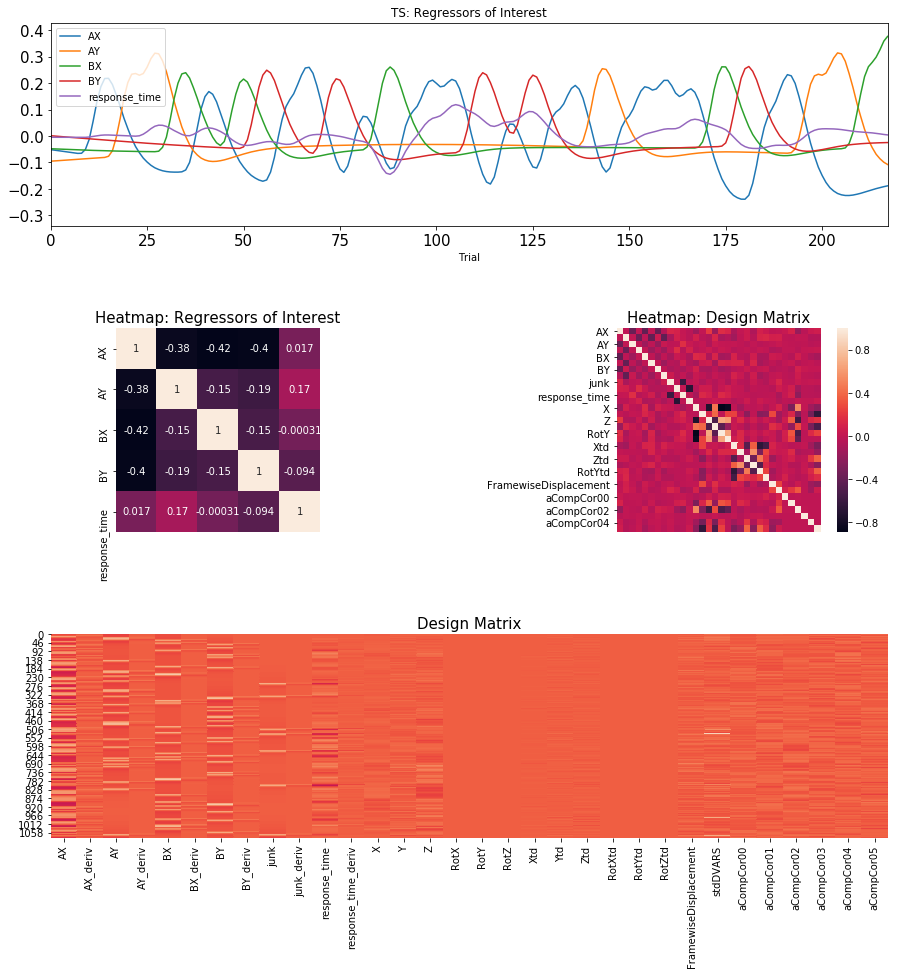

In [23]:
plot_design(design_df, size=15)

/usr/local/miniconda/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/usr/local/miniconda/lib/python3.6/site-packages/numpy/ma/core.py:3201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


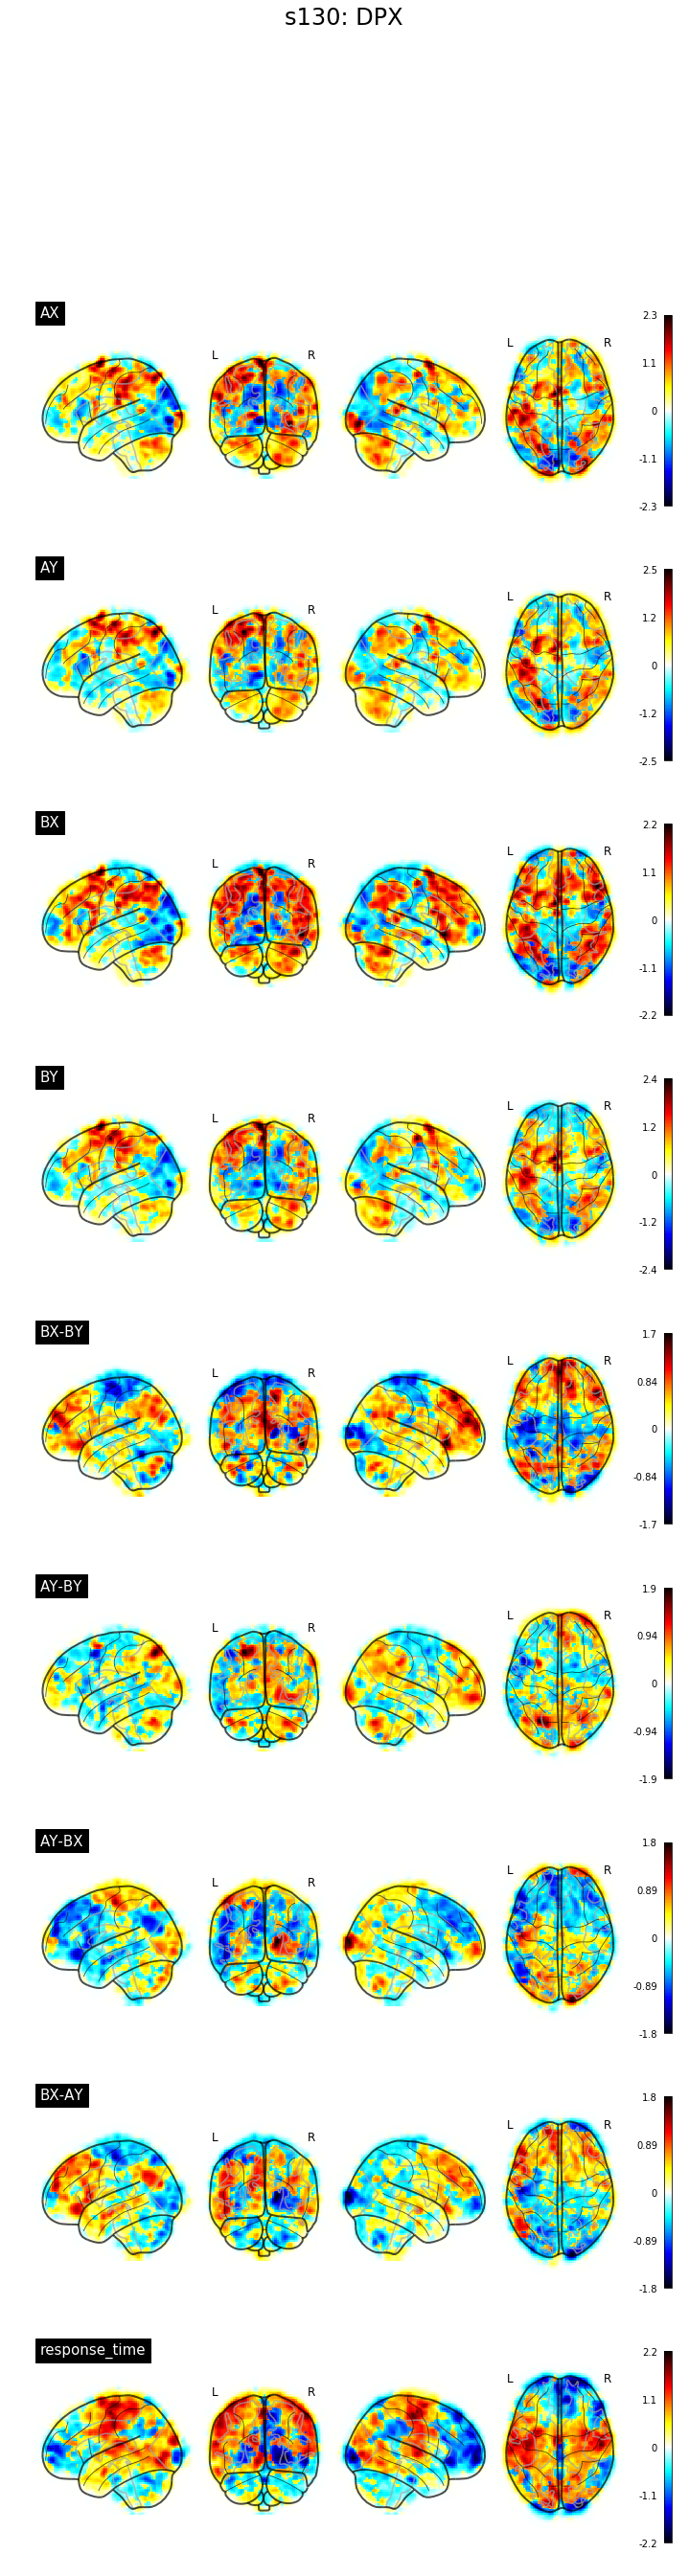

In [22]:
contrast_files = plot_1stlevel_maps(GLM_path)
